**1. Import libraries**

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

**2. Define interations and learning rate for Gradient Descent**

In [14]:
# number of interations in Gradient Descent
INTERATIONS = 200000
# learning rate
ETA = 0.001

**3. Plot data from data.csv**

In [15]:
url = "https://raw.githubusercontent.com/ToDuyHung/testLogisticRegression/master/data.csv"      
df  = pd.read_csv(url)
df

,literature,math,pass
0,35,78,0
1,30,44,0
2,36,73,0
3,60,86,1
4,79,75,1
5,45,56,0
6,61,97,1
7,75,47,1
8,76,87,1
9,84,44,1


The blue circle represents the students who fail
The red cross represents the students who pass


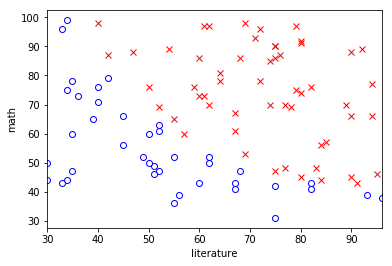

In [16]:
# plot data
df_0 = df[df['pass'] == 0]
df_1 = df[df['pass'] == 1]
print('The blue circle represents the students who fail')
print('The red cross represents the students who pass')
df_0.plot(x='literature', y='math', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.literature, df_1.math, marker='x', linestyle='None', mec='r', mfc='w')
plt.xlabel('literature'); plt.ylabel('math'); plt.show()

# extract X,y
X = df.values[:, 0:2]
y = df.values[:,2]
m = y.size # number of training samples
# add X_0 to X
X = np.concatenate((np.ones((m,1)), X.reshape(-1,2)), axis=1)

**4. Build sigmoid function**

In [17]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

**5. Build loss function J**

In [18]:
def loss_function(X, y, theta):
    # number of training samples
    m = y.size
    # activation
    h = sigmoid(np.dot(X, theta))
    # loss
    j = - np.sum(y * np.log(h) + (1 -  y) * np.log(1 - h)) / m
    return j

**6. Build Gradient Descent**

In [19]:
def gradient_descent(X, y, theta, eta, num_inters):
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = np.dot(X.T, sigmoid(np.dot(X, theta))- y) / m
        theta -= eta * delta
        jHistory[i] = loss_function(X, y, theta)
    
    return theta, jHistory

**7. Learn parameters**

[w0,w1,w2] = 
[-7.43058839  0.0651809   0.058998  ]
------
J after Gradient Descent


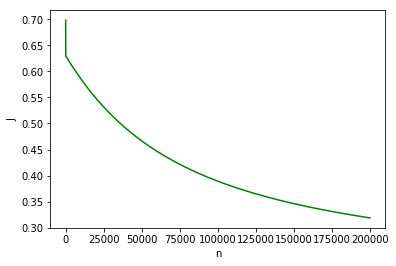

In [20]:
theta, jHistory = gradient_descent(X, y, np.zeros(X.shape[1]), ETA, INTERATIONS)
print('[w0,w1,w2] = ')
print(theta)
print('------')
# plot J
print('J after Gradient Descent')
plt.plot(range(jHistory.size), jHistory, color='g')
plt.xlabel('n'); plt.ylabel('J'); plt.show()

**8. Plot results**

The blue circle represents the students who fail
The red cross represents the students who pass


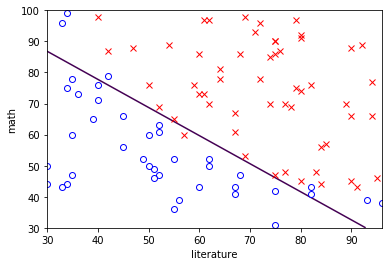

In [21]:
# training data
df_0.plot(x='literature', y='math', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.literature, df_1.math, marker='x', linestyle='None', mec='r', mfc='w')

# decision line
x = np.linspace(30.0, 100.0, num=100)
y = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        y[i][j] = sigmoid(np.dot(np.array([1.0, x[i], x[j]]).T, theta))
plt.contour(x, x, y, levels=[0.0, 0.5])

# plot result
print('The blue circle represents the students who fail')
print('The red cross represents the students who pass')
plt.xlabel('literature'); plt.ylabel('math'); plt.show()